# Ejercicio 3
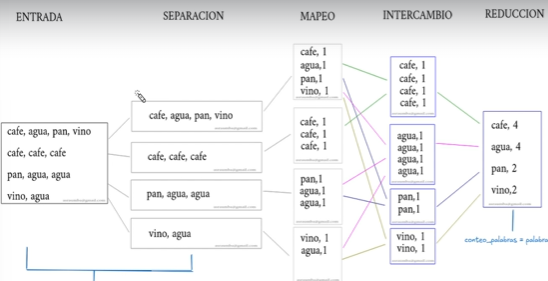

In [1]:
#######################################################
#Configuración inicial
#######################################################

import findspark #Librería para encontrar donde está instalado spark
findspark.init() 

from pyspark.sql import SparkSession #Iniciar la sesión de spark

# Creamos la sesión de spark
spark = SparkSession.builder \
    .appName("EjemploRDD") \
    .master("local[*]") \
    .getOrCreate() 
#######################################################
sc = spark.sparkContext

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/08/28 12:21:26 WARN Utils: Your hostname, TECNICA, resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/08/28 12:21:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/28 12:21:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### `textFile`
**`SparkContext.textFile(name, minPartitions=None, use_unicode=True)`**

Se usa para leer archivos de texto de *HDFS (Hadoop Distributed File System): Es un sistema de archivos distribuidos, que es el principal sistema de almacenamiento de Hadoop*

* **name** : *str* Directorio de donde se encuentran los archivo de datos, pueden ser separados por comma los paths
* **minPartitions** : *int, optional*  Sugiere el número de particiones para las particiones del RDD
* **use_unicode** : *bool, default True* Si use_unicode es Falso, las cadenas se mantendrán como str (codificación como utf-8), que es más rápido y más pequeño que Unicode
* **Return** : RDD que representa los datos de texto de los archivos


In [35]:
path_file = './exercise_narrow_wide.txt'
text_lines = sc.textFile(path_file)
#print(text_lines.collect()) #Visualizar lo que creó el rdd en una lista

### `flatMap`

**`RDD.flatMap(f, preservesPartitioning=False)`**

Retorna un nuevo RDD aplicandola función a todos los elementos del RDD, y entonces 'aplana los resultados', es decir los pone en una fila
* **f** : *function* Una función donde se aplica una transformación de los datos
* **preservesPartitioning** : *bool, optional, default False* Indica si la función de entrada conserva el particionador, lo cual debe ser `Falso` a menos que se trate de un par RDD y la función de entrada no modifique las claves
* **Return** :  Un nuevo RDD aplicando la función a todos los elementos

In [ ]:
get_words = text_lines.flatMap(lambda x : x.split(',') if x != '' else '-')

### `map`
**`RDD.map(f, preservesPartitioning=False)`**
Devuelve un nuevo RDD aplicando la función a cada elemento del RDD de entrada

* **f** : *function* Una función donde se aplica una transformación de los datos
* **preservesPartitioning** : *bool, optional, default False* Indica si la función de entrada conserva el particionador, lo cual debe ser `Falso` a menos que se trate de un par RDD y la función de entrada no modifique las claves
* **Return** :  Un nuevo RDD aplicando la función a todos los elementos

 *La diferencia fundamental con `flatmap` es que mmientras `map` transforma cada elemento en un único elemento nuevo , `flatmap` transforma cada elemento en cero , uno o múltiples elementos nuevos* 

In [ ]:
get_tuples = get_words.map(lambda word: (word , 1))

### `reduceByKey`
**`RDD.reduceByKey(func, numPartitions=None, partitionFunc=<function portable_hash>)`**

Agrupa un RDD en pares `(clave, valor)` y aplica una función para reducir todos los valores de cada clave a un solo valor. Es extremadamente rápido porque realiza una pre-organización en cada nodo antes de mover los datos por la red.

* **func** es la operación que le dices a Spark que use para "reducir" o "combinar" los valores; dicha función debe cumplir dos requisitos muy importantes
  1. Toma dos argumentos del mismo tipo (los valores a combinar)
  2. Devuelve un solo argumento del mismo tipo (el resultado de la combinación)
* Para que Spark pueda garantizar un resultado correcto en un entorno distribuido, la función debe ser **asociativa** *((a+b)+c = a+(b+c))* y **conmutativa** *(a+b = b+a)*
* **numPartitions** : *int , optional* el número de particiones en un nuevo RDD
* **partitionFunc** : *function, optional, default portable_hash* Es una función opcional que otorga un control avanzado sobre cómo se distribuyen los datos entre las particiones durante la fase del shuffle . Permite definir tu propia regla de negocio para decidir a que partición debe ir cada clave , en lugar de usar la regla estándar de spark
* **Return**: Devuelve un RDD que contiene las llaves y el resultado agregado para cada clave

In [30]:
count_words = get_tuples.reduceByKey(lambda x, y: x+y)

[('café', 4), ('agua', 4), ('pan', 2), ('vino', 2)]


### `sortBy`
**`RDD.sortBy(keyfunc, ascending=True, numPartitions=None)`**

Ordena el RDD según la clave proporcionada *keyfunc*
* **keyfunc** : *function* función para generar el key
* **ascending** : *bool, optional, default true* Ordena las claves en orden ascendente o descendente
* **numPartitions** : *int, optional* el número de particiones en el nuevo rdd
* **Return** : Un nuevo RDD

In [34]:
count_ordered = count_words.sortBy(lambda x: x[1], ascending= False)
print(count_ordered.collect())

[('café', 4), ('agua', 4), ('pan', 2), ('vino', 2)]


### `str.split`
**`str.split(pat=None, n=- 1, expand=False)`**

`split` es un método de pandas que divide cadenas alrededor del *separador/delimitador* dado. Funciona sobre una serie (una columna de un dataframe), y la descompone en partes más pequeñas.
* **pat** : *str, optional* String o expresión regular con la cual se van a dividir los datos. Si no se especifica se dividirá con *espacio en blanco*
* **n** : *int, default -1 (all)* : Hace referencia a cuantos cortes se realizan, por defecto es `n=-1` que significa cortar todas las veces que sea necesario. `n=1` Realiza solo el primer corte que encuentre de izquierda a derecha. `expand = True` el resultado nos genera un dataFrame nuevo , donde cada trozo se coloca en una nueva columna
* **expand** : *bool, default False*  *bool, default False* Expande las cadenas divididas en columnas separadas
   * Si es `true`, n debe ser un entero positivo y devuelve DataFrame expandiendo la dimensionalidad
   * Si es `false`, devuelve series , que contiene listas de cadenas

### `countByValue()`

**Return** : *dict* un diccionario de (valor y cantidad) como un group by

### `strip()`
**`str.strip(to_strip=None)`**

Elimina los espacios en blanco o un conjunto de caractéres especificados de cada cadena de la serie
* **to_strip** : *str*  Especifica el conjunto de caractéres que se eliminarán . Si no se especifica se eliminarán los espacios en blanco
* **Return** : serie de objetos
